In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings 
warnings.filterwarnings("ignore")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
df=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.columns=['age','sex','Chest Pain','blood pressure','cholestoral','sugar > 120 ?',
            'Electrocardiogram','Heart rate','Induced angina','oldpeak','slp','Main vessels','thall','output']


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                303 non-null    int64  
 1   sex                303 non-null    int64  
 2   Chest Pain         303 non-null    int64  
 3   blood pressure     303 non-null    int64  
 4   cholestoral        303 non-null    int64  
 5   sugar > 120 ?      303 non-null    int64  
 6   Electrocardiogram  303 non-null    int64  
 7   Heart rate         303 non-null    int64  
 8   Induced angina     303 non-null    int64  
 9   oldpeak            303 non-null    float64
 10  slp                303 non-null    int64  
 11  Main vessels       303 non-null    int64  
 12  thall              303 non-null    int64  
 13  output             303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,age,sex,Chest Pain,blood pressure,cholestoral,sugar > 120 ?,Electrocardiogram,Heart rate,Induced angina,oldpeak,slp,Main vessels,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.isnull().sum()

age                  0
sex                  0
Chest Pain           0
blood pressure       0
cholestoral          0
sugar > 120 ?        0
Electrocardiogram    0
Heart rate           0
Induced angina       0
oldpeak              0
slp                  0
Main vessels         0
thall                0
output               0
dtype: int64

# **eda**

<Axes: xlabel='age', ylabel='Count'>

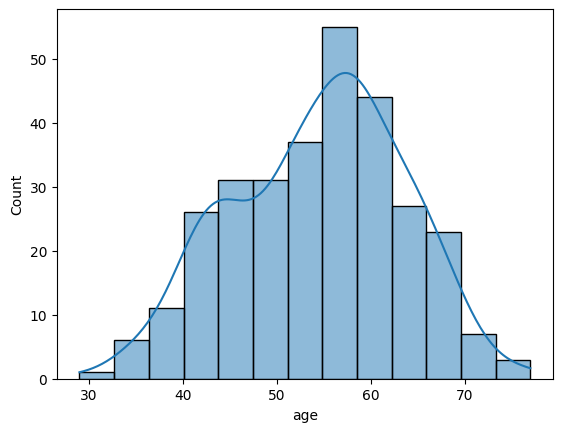

In [11]:
sns.histplot(x='age',data=df,kde=True)

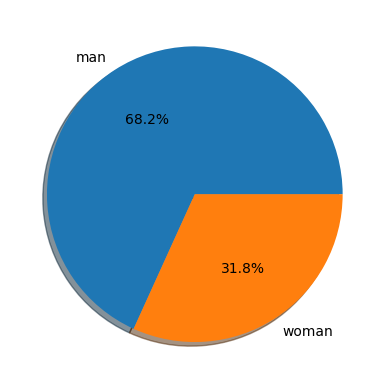

In [19]:
gender=['man','woman']
plt.pie(df['sex'].value_counts(),autopct='%1.1f%%',
       labels=gender,shadow=True)
plt.show()

<Axes: xlabel='Chest Pain', ylabel='count'>

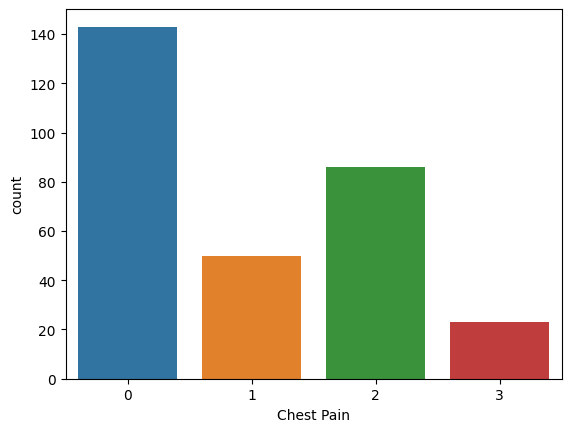

In [20]:
sns.countplot(x='Chest Pain',data=df)

<Axes: xlabel='blood pressure', ylabel='Count'>

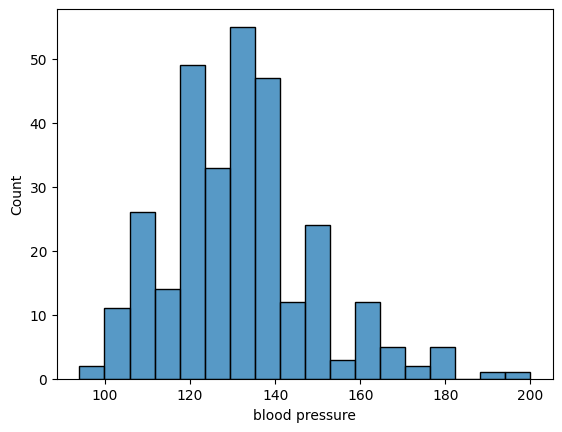

In [21]:
sns.histplot(x='blood pressure',data=df)

<Axes: xlabel='cholestoral', ylabel='Count'>

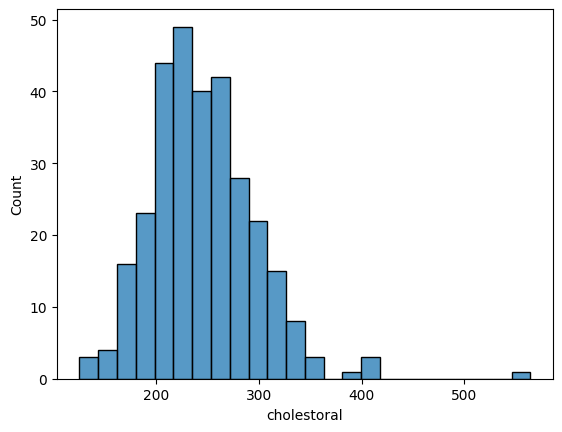

In [22]:
sns.histplot(x='cholestoral',data=df)

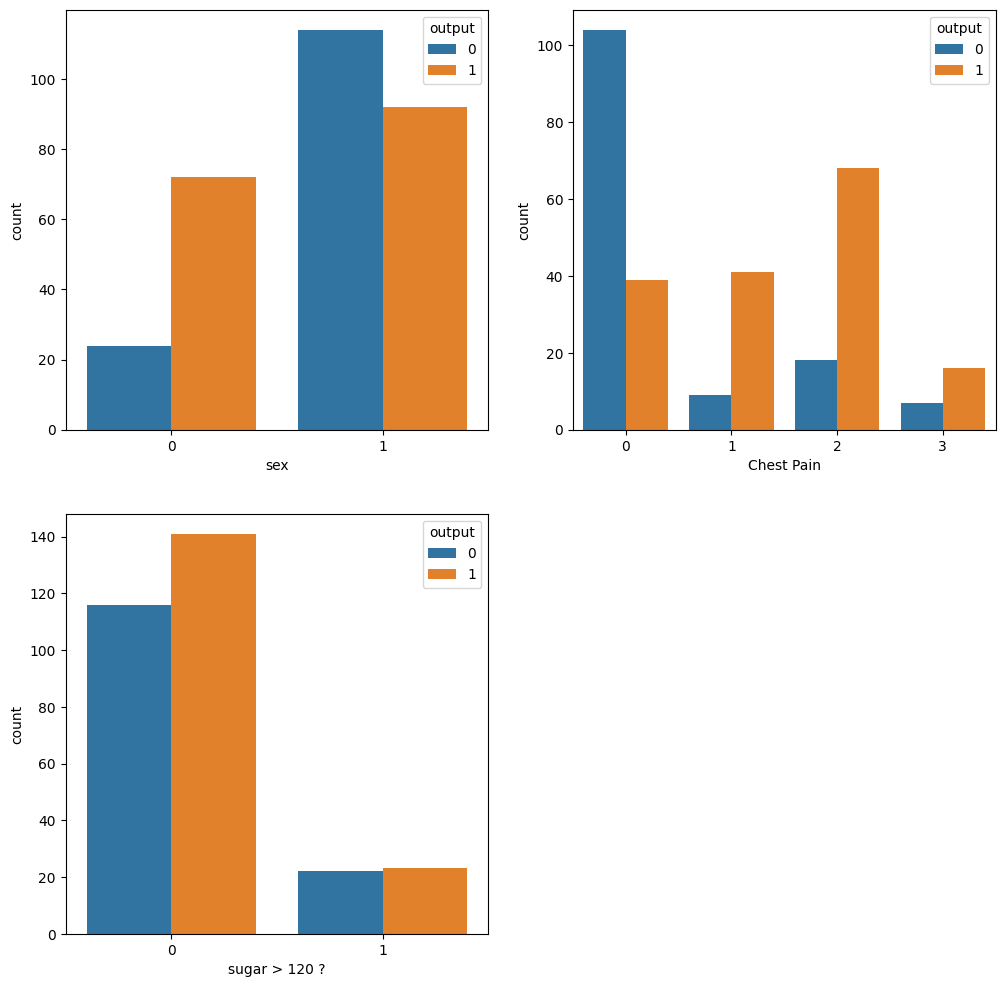

In [51]:
fig=plt.figure(figsize=(12,12))

ax=fig.add_subplot(221)
sns.countplot(data=df,x='sex',hue='output')  

ax=fig.add_subplot(222)
sns.countplot(data=df,x='Chest Pain',hue='output')

ax=fig.add_subplot(223)
sns.countplot(data=df,x='sugar > 120 ?',hue='output')

plt.show()